In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import scale

In [ ]:
def plot_data_labels_dict(data_labels_dict, n_datasets, cmap="bwr"):
    fig, axes = plt.subplots(n_datasets, 2, figsize=(10, 24/5*n_datasets), sharex=True, sharey=True)
    for i, (category, (data, labels)) in enumerate(data_labels_dict.items()):
        axes[i][0].scatter(data[:, 0], data[:, 1], s=1)
        axes[i][1].scatter(data[:, 0], data[:, 1], s=1, c=labels, cmap=cmap)
    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

In [ ]:
n_datapoints = 10_000

# scikit-learn datasets

In [20]:
sk_datasets = {}
sk_labels = {}

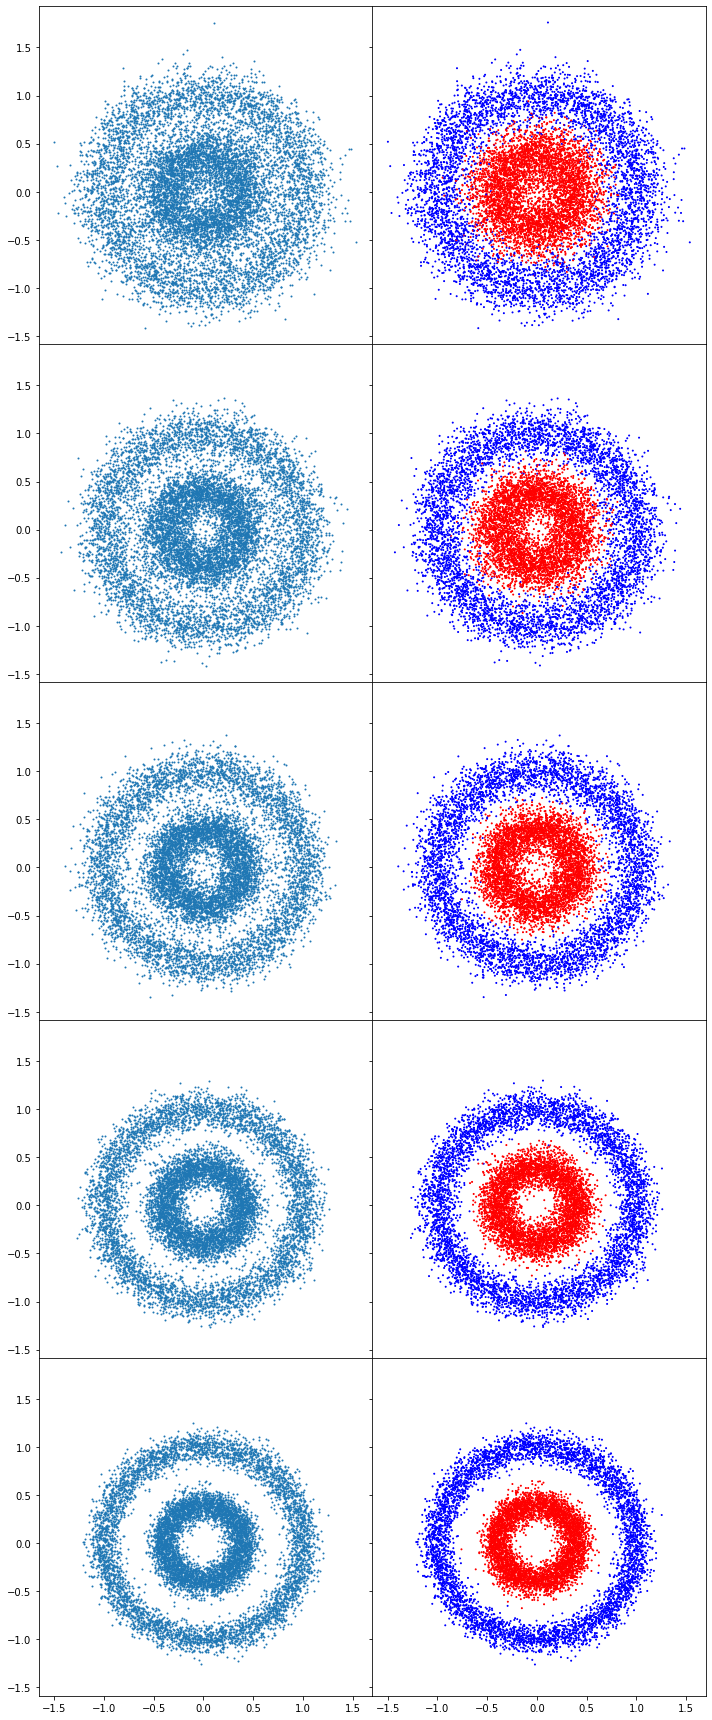

In [21]:
noise_categories = ["vhigh", "high", "med", "low", "vlow"]
noise_levels = [0.16, 0.14, 0.12, 0.1, 0.08]

circles_dict = {category:datasets.make_circles(n_samples=n_datapoints, noise=level, factor=0.4)
              for category, level in zip(noise_categories, noise_levels)}

plot_data_labels_dict(circles_dict, len(noise_categories))

for category, (data, labels) in circles_dict.items():
    sk_datasets["circles_" + category + "_noise"] = data
    sk_labels["circles_" + category + "_noise"] = labels

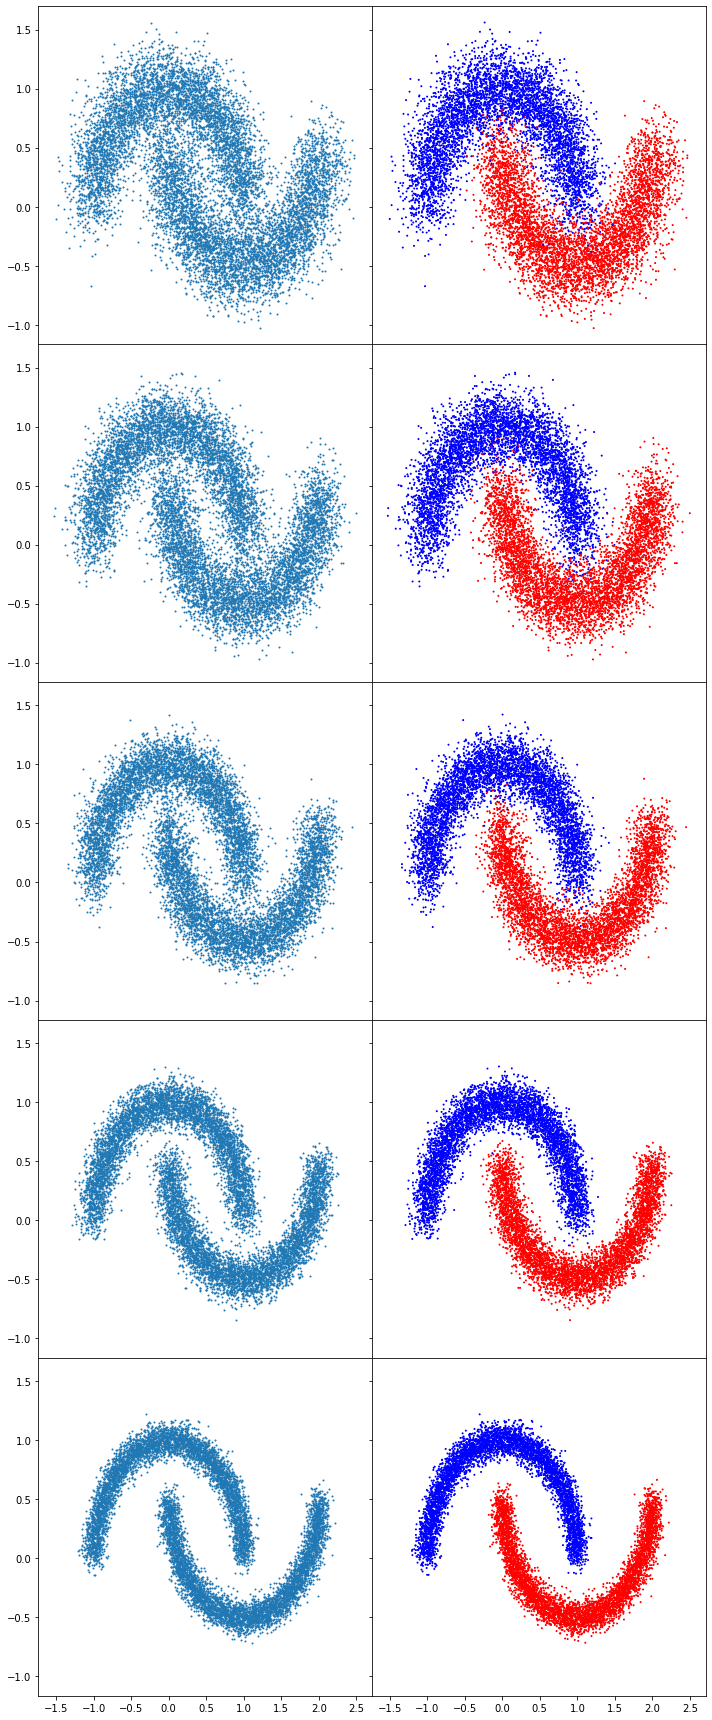

In [22]:
noise_categories = ["vhigh", "high", "med", "low", "vlow"]
noise_levels = [0.18, 0.16, 0.13, 0.1, 0.07]

moons_dict = {category:datasets.make_moons(n_samples=n_datapoints, noise=level)
              for category, level in zip(noise_categories, noise_levels)}

plot_data_labels_dict(moons_dict, 5)
    
for category, (data, labels) in moons_dict.items():
    sk_datasets["moons_" + category + "_noise"] = data
    sk_labels["moons_" + category + "_noise"] = labels

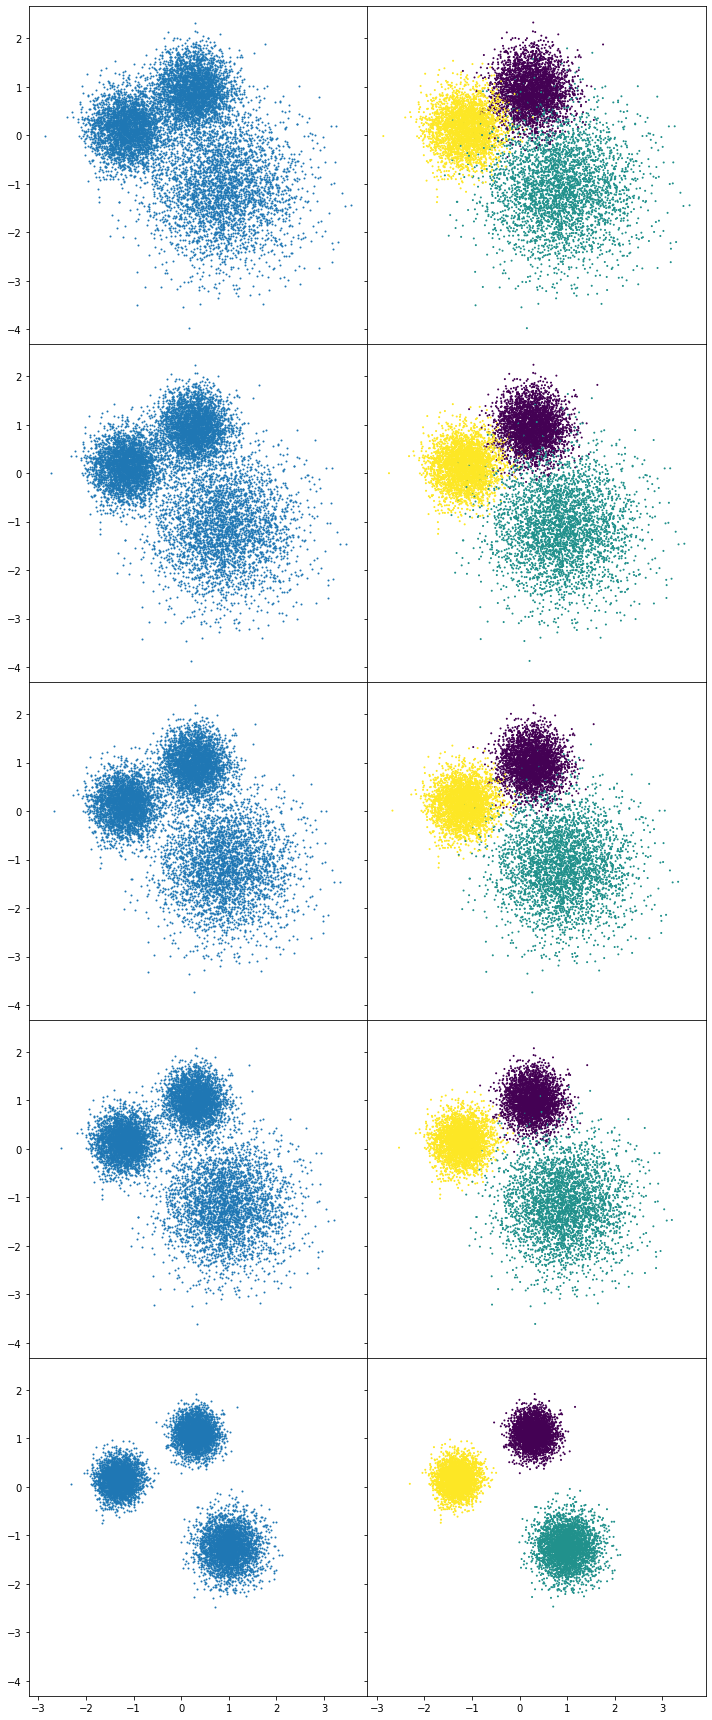

In [23]:
noise_categories = ["vhigh", "high", "med", "low", "vlow"]
noise_levels = [(0.7, 1.4, 0.7), 
                (0.625, 1.3, 0.625), 
                (0.575, 1.2, 0.575), 
                (0.5, 1.1, 0.5), 
                (0.35, 0.5, 0.35)]

blobs_dict = {category:datasets.make_blobs(n_samples=n_datapoints, cluster_std=level, random_state=0)
              for category, level in zip(noise_categories, noise_levels)}
blobs_dict = {category:(scale(data), labels) for category, (data, labels) in blobs_dict.items()}


plot_data_labels_dict(blobs_dict, 5, "viridis")

for category, (data, labels) in blobs_dict.items():
    sk_datasets["blobs_" + category + "_noise"] = data
    sk_labels["blobs_" + category + "_noise"] = labels

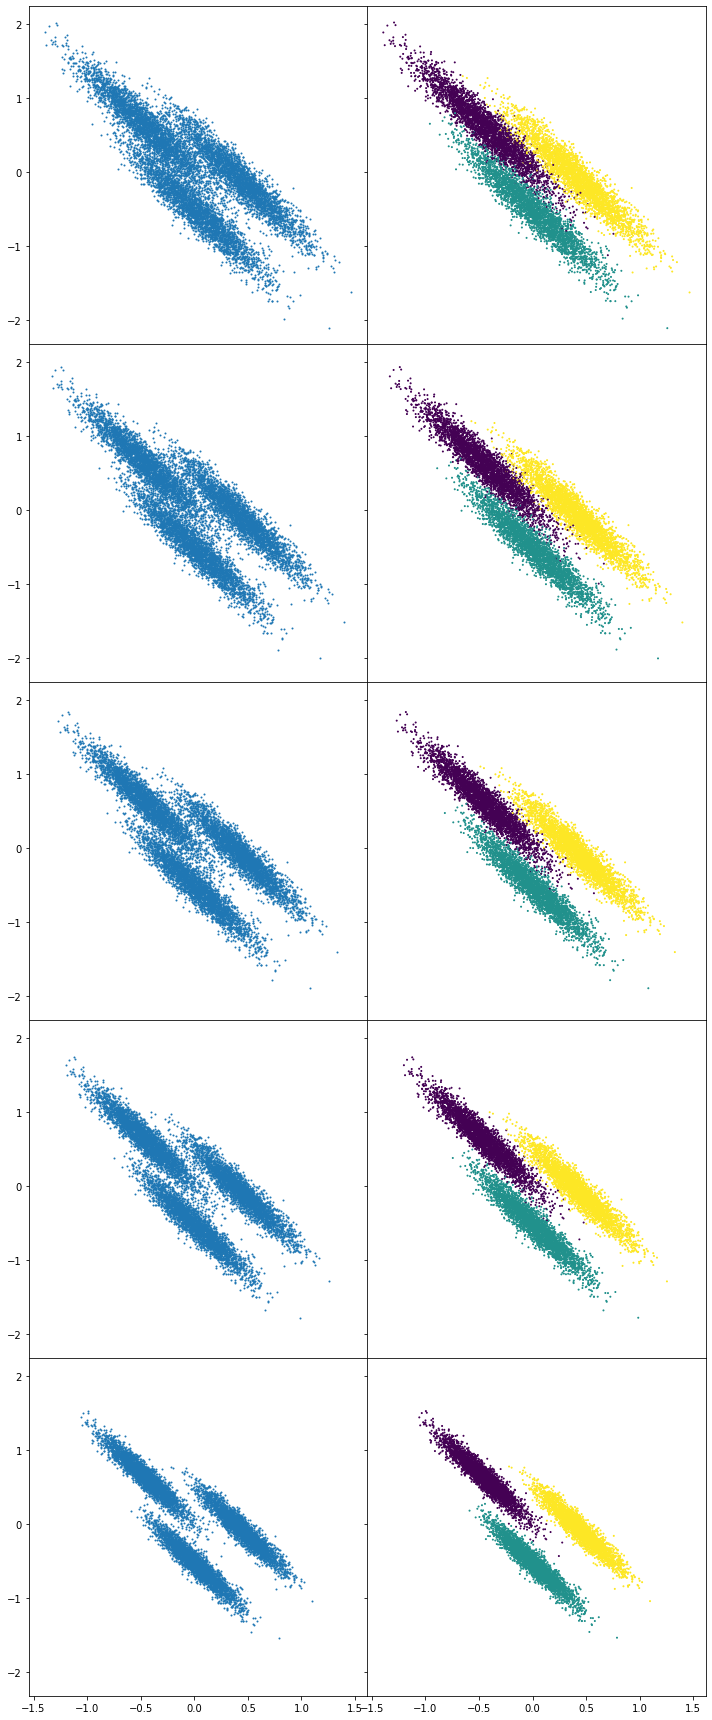

In [24]:
noise_categories = ["vhigh", "high", "med", "low", "vlow"]
noise_levels = [2.4, 2.2, 2, 1.8, 1.4]
transform = np.array([[0.6, -0.6], [-0.4, 0.8]])

blobs_dict = {category:datasets.make_blobs(n_samples=n_datapoints, cluster_std=level, random_state=17)
              for category, level in zip(noise_categories, noise_levels)}
blobs_dict = {category:(np.dot(scale(data[0]), transform), data[1]) for category, data in blobs_dict.items()}

plot_data_labels_dict(blobs_dict, 5, "viridis")   

for category, (data, labels) in blobs_dict.items():
    sk_datasets["longblobs_" + category + "_noise"] = data
    sk_labels["longblobs_" + category + "_noise"] = labels

In [25]:
np.savez("sklearn_data.npz", **sk_datasets)
np.savez("sklearn_labels.npz", **sk_labels)

In [26]:
loaded_data = np.load("sklearn_data.npz")
loaded_data.files

['circles_vhigh_noise',
 'circles_high_noise',
 'circles_med_noise',
 'circles_low_noise',
 'circles_vlow_noise',
 'moons_vhigh_noise',
 'moons_high_noise',
 'moons_med_noise',
 'moons_low_noise',
 'moons_vlow_noise',
 'blobs_vhigh_noise',
 'blobs_high_noise',
 'blobs_med_noise',
 'blobs_low_noise',
 'blobs_vlow_noise',
 'longblobs_vhigh_noise',
 'longblobs_high_noise',
 'longblobs_med_noise',
 'longblobs_low_noise',
 'longblobs_vlow_noise']

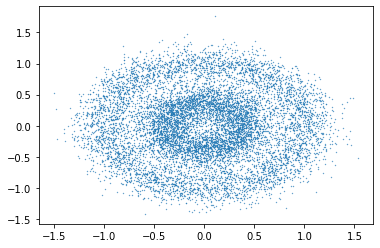

In [27]:
plt.scatter(loaded_data["circles_vhigh_noise"][:, 0], loaded_data["circles_vhigh_noise"][:, 1], s=0.1)

In [28]:
loaded_labels = np.load("sklearn_labels.npz")
loaded_labels.files

['circles_vhigh_noise',
 'circles_high_noise',
 'circles_med_noise',
 'circles_low_noise',
 'circles_vlow_noise',
 'moons_vhigh_noise',
 'moons_high_noise',
 'moons_med_noise',
 'moons_low_noise',
 'moons_vlow_noise',
 'blobs_vhigh_noise',
 'blobs_high_noise',
 'blobs_med_noise',
 'blobs_low_noise',
 'blobs_vlow_noise',
 'longblobs_vhigh_noise',
 'longblobs_high_noise',
 'longblobs_med_noise',
 'longblobs_low_noise',
 'longblobs_vlow_noise']

In [29]:
loaded_data["circles_vhigh_noise"]

array([[ 0.14405241, -0.91589745],
       [-0.08596644, -0.40120445],
       [-0.70838221,  0.56263863],
       ...,
       [-0.24844655, -0.7321204 ],
       [ 0.83762957, -0.531842  ],
       [-0.2355391 ,  0.31850628]])

# Single-Cluster Multiple-Group

## Circle

In [30]:
scmg_datasets = {}
scmg_labels = {}

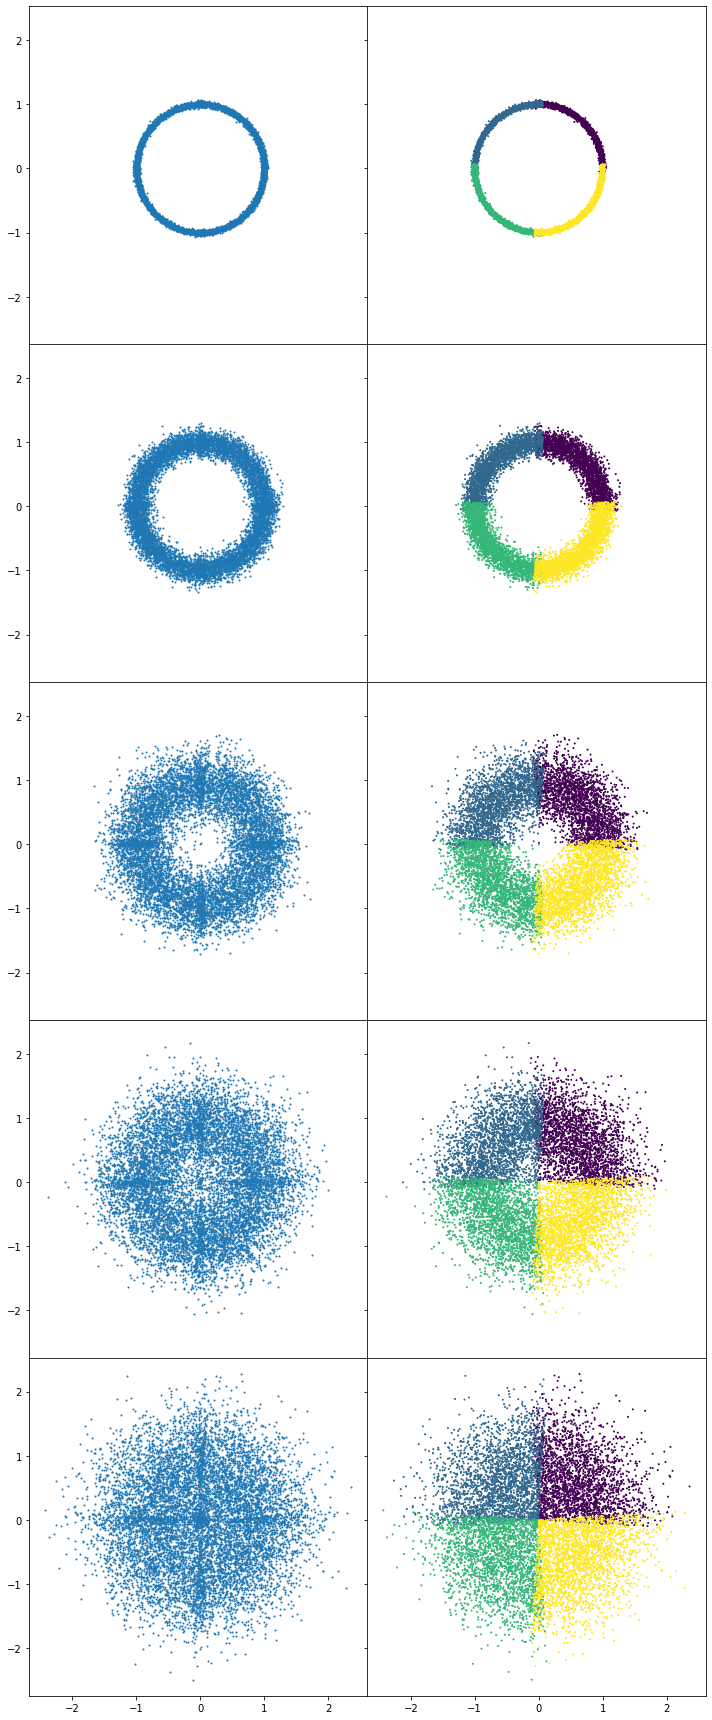

In [31]:
noise_categories = ["vhigh", "high", "med", "low", "vlow"]
noise_levels = [0.02, 0.1, 0.25, 0.35, 0.45]
n_circle_groups = 4
angle_step = 2*np.pi/n_circle_groups
angle_epsilon = (2*np.pi)/100
n_angles = n_datapoints//n_circle_groups

scmg_circle = {}
for category, level in zip(noise_categories, noise_levels):
    rs = np.abs(np.random.normal(1, level, n_datapoints))
    angles = []
    labels = []
#     print(rs)
    for i, angle in enumerate(np.linspace(0, 2*np.pi, n_circle_groups, endpoint=False)):
        angle_low = angle - angle_epsilon
        angle_high = angle + angle_step + angle_epsilon
        angles.extend(np.random.uniform(angle_low, angle_high, n_angles).tolist())
        labels.extend([i]*n_angles)
    angles = np.array(angles)
    labels = np.array(labels)
    xys = np.column_stack((rs * np.cos(angles), rs * np.sin(angles)))
    
    scmg_circle[category] = (xys, labels)
            
        
plot_data_labels_dict(scmg_circle, 5, "viridis")

for category, (data, labels) in scmg_circle.items():
    scmg_datasets["circle_" + category + "_noise"] = data
    scmg_labels["circle_" + category + "_noise"] = labels


In [ ]:
noise_categories = ["vhigh", "high", "med", "low", "vlow"]
noise_levels = [0.02, 0.1, 0.25, 0.35, 0.45]
n_phi_groups = 4
n_theta_groups = 2

phi_step = 2*np.pi/n_phi_groups
phi_epsilon = (2*np.pi)/100

theta_step = np.pi/n_theta_groups
theta_epsilon = np.pi/100

n_phis = n_datapoints//n_phi_groups
n_thetas = n_phis//n_theta_groups

scmg_sphere = {}
for category, level in zip(noise_categories, noise_levels):
    rs = np.abs(np.random.normal(1, level, n_datapoints))
    phis = []
    thetas = []
    labels = []
#     print(rs)
    for i, phi in enumerate(np.linspace(0, 2*np.pi, n_phi_groups, endpoint=False)):
        print("i:", i)
        phi_low = phi - phi_epsilon
        phi_high = phi + phi_step + phi_epsilon
        phi.extend(np.random.uniform(phi_low, phi_high, n_phis).tolist())
        
        for j, theta in enumerate(np.linspace(0, np.pi, n_theta_groups, enpoint=False)):
            print("j:", j)
            theta_low = theta - theta_epsilon
            theta_high = theta + theta_step + theta_epsilon
            theta.extend(np.random.uniform(theta_low, theta_high, n_thetas).tolist())
            
            labels.extend([i + n_phi_groups*j]*n_theta_groups)
               
            
    phis = np.array(phis)
    thetas = np.array(thetas)
    labels = np.array(labels)
    
    xyzs = np.column_stack((rs * np.cos(phis) * np.sin(thetas), 
                            rs * np.sin(phis) * np.sin(thetas),
                            rs * np.cos(thetas))
    
    scmg_sphere[category] = (xyzs, labels)
            
        
plot_data_labels_dict(scmg_sphere, 5, "viridis")

# for category, (data, labels) in scmg_circle.items():
#     scmg_datasets["circle_" + category + "_noise"] = data
#     scmg_labels["circle_" + category + "_noise"] = labels


In [36]:
np.savez("singlecluster_multigroup_data.npz", **scmg_datasets)
np.savez("singlecluster_multigroup_labels.npz", **scmg_labels)